## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline


## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp  = pd.read_csv(
    Path('../crypto_arbitrage/Resources/bitstamp.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)




### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('../crypto_arbitrage/Resources/coinbase.csv'), 
    index_col="Timestamp", 
    parse_dates=True, 
    infer_datetime_format=True
)




In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp = bitstamp.dropna()
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close              object
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].str.replace("$", "")

### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp.loc[:, "Close"] = bitstamp.loc[:, "Close"].astype(float)
bitstamp.dtypes

Open              float64
High              float64
Low               float64
Close             float64
BTC Volume        float64
USD Volume        float64
Weighted Price    float64
dtype: object

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp = bitstamp.drop_duplicates()
bitstamp.duplicated().sum()

0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
# Repeat Steps 1–4 for the coinbase DataFrame

# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase = coinbase.dropna()
coinbase.dtypes

# Convert coinbase Close to string value and check type
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("string")
coinbase.dtypes

# Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].str.replace("$", "")

# Convert coinbase close back to float and check type
coinbase.loc[:, "Close"] = coinbase.loc[:, "Close"].astype("float")
coinbase.dtypes

# Drop coinbase duplicates and check sum
coinbase = coinbase.drop_duplicates()
coinbase.duplicated().sum()

#confirm data is clean
coinbase.head()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [11]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.iloc[:, [3]] 


# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()


,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54
2015-12-31 19:06:00,432.52


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.iloc[:, [3]] 

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()

,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [13]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp.describe()


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06,1.347772e+06
mean,4.503959e+03,4.507642e+03,4.499786e+03,4.503924e+03,7.911510e+00,3.991326e+04,4.503678e+03
std,3.956188e+03,3.960719e+03,3.950903e+03,3.956149e+03,1.986799e+01,1.171926e+05,3.955833e+03
min,3.525600e+02,3.536400e+02,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.521493e+02
25%,7.889100e+02,7.889900e+02,7.888000e+02,7.888900e+02,3.833169e-01,6.268523e+02,7.888853e+02
50%,3.788730e+03,3.791430e+03,3.786030e+03,3.788990e+03,2.013215e+00,5.779344e+03,3.788660e+03
75%,6.929362e+03,6.933483e+03,6.924840e+03,6.929443e+03,7.462753e+00,3.017330e+04,6.929208e+03
max,1.966576e+04,1.966600e+04,1.964996e+04,1.966575e+04,1.616060e+03,5.483271e+06,1.966330e+04


In [14]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase.describe()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
count,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06,1.549523e+06
mean,4.091927e+03,4.093727e+03,4.089974e+03,4.091926e+03,8.166907e+00,4.568889e+04,4.091847e+03
std,3.913505e+03,3.915935e+03,3.910917e+03,3.913501e+03,1.837862e+01,1.575088e+05,3.913428e+03
min,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,4.255500e-06,6.000000e-02
25%,6.754400e+02,6.756200e+02,6.751600e+02,6.754000e+02,1.004880e+00,1.330350e+03,6.753913e+02
50%,2.710690e+03,2.711700e+03,2.709970e+03,2.710730e+03,2.914855e+00,7.273329e+03,2.710628e+03
75%,6.593500e+03,6.595000e+03,6.591805e+03,6.593500e+03,8.061827e+00,2.972588e+04,6.593470e+03
max,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.156319e+03,1.997076e+07,1.989199e+04


<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

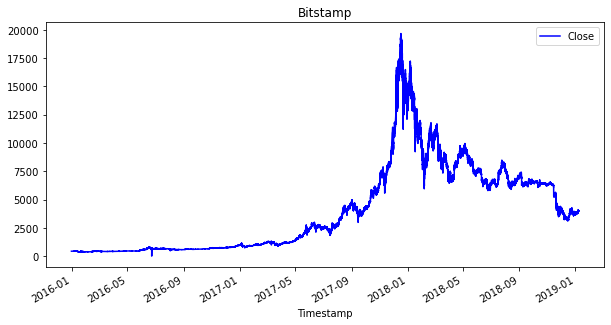

In [15]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced.plot(figsize=(10, 5), title ="Bitstamp", color="Blue")

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

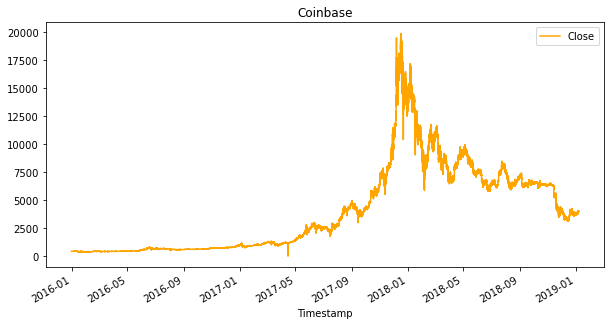

In [16]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced.plot(figsize=(10, 5), title='Coinbase', color='Orange')

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

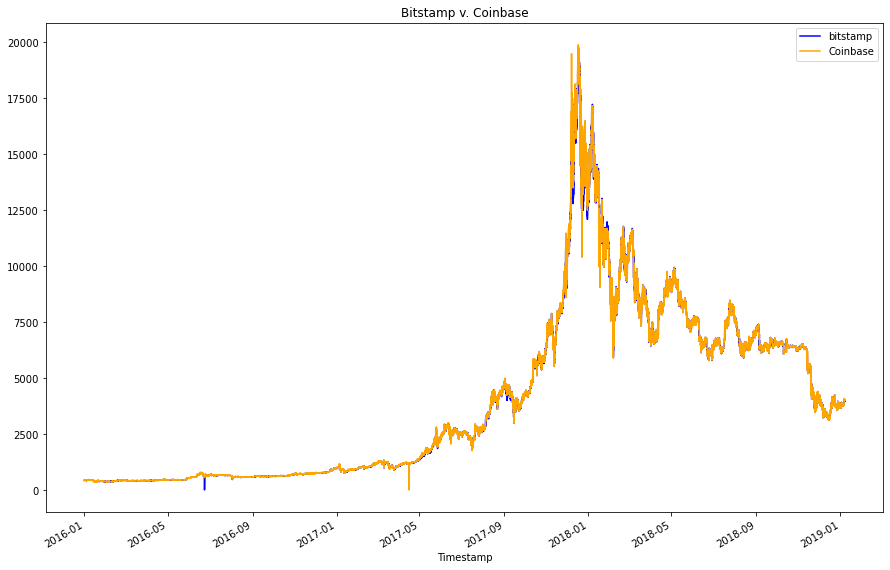

In [17]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced['Close'].plot(legend=True, figsize=(15, 10), title="Bitstamp v. Coinbase", color="blue", label="bitstamp")
coinbase_sliced['Close'].plot(legend=True, figsize=(15, 10), color="orange", label="Coinbase")





<AxesSubplot:title={'center':'July 2016'}, xlabel='Timestamp'>

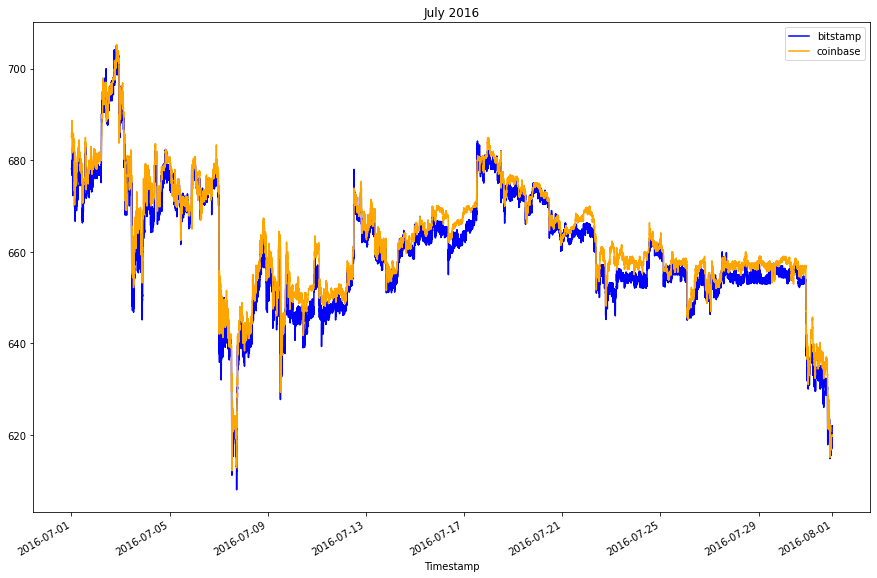

In [18]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced['Close'].loc['2016-07-01' : '2016-07-31'].plot(
    legend=True, figsize=(15, 10), title="July 2016", color="blue", label="bitstamp")
coinbase_sliced['Close'].loc['2016-07-01' : '2016-07-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

<AxesSubplot:title={'center':'September 2018'}, xlabel='Timestamp'>

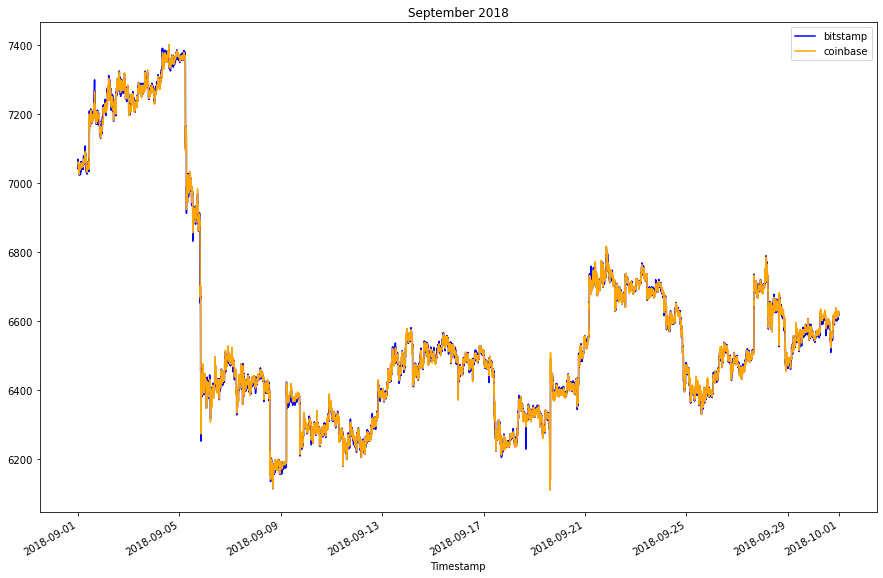

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp_sliced['Close'].loc['2018-09-01' : '2018-09-30'].plot(
    legend=True, figsize=(15, 10), title="September 2018", color="blue", label="bitstamp")
coinbase_sliced['Close'].loc['2018-09-01' : '2018-09-30'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** # YOUR ANSWER HERE 
The spread has dropped over the years as time has progressed and arbitrage opportunities by institutions become too exticing to pass up

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'May 2016'}, xlabel='Timestamp'>

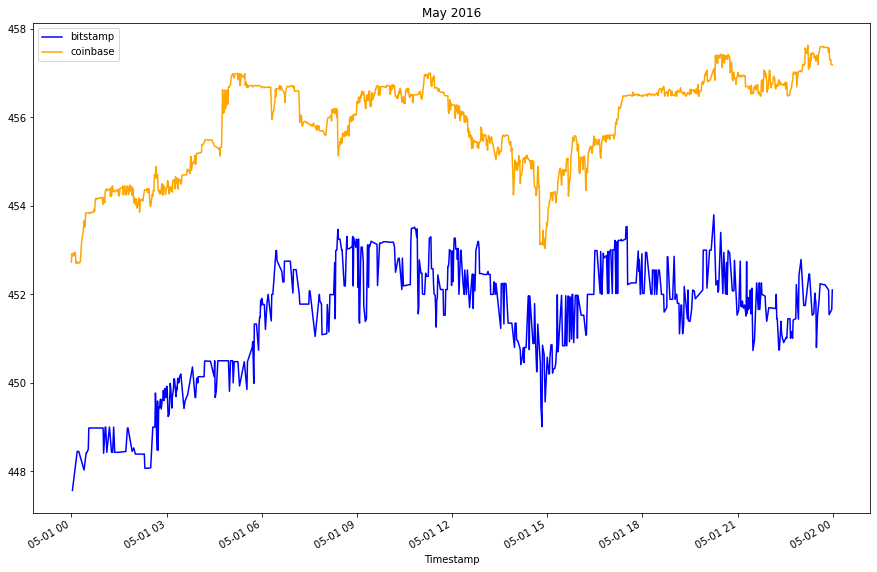

In [20]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced['Close'].loc['2016-05-01' : '2016-05-01'].plot(
    legend=True, figsize=(15, 10), title="May 2016", color="blue", label="bitstamp")
coinbase_sliced['Close'].loc['2016-05-01' : '2016-05-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [21]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-05-01'] -bitstamp_sliced['Close'].loc['2016-05-01']

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()



count    579.000000
mean       4.296131
std        1.008769
min        1.870000
25%        3.510000
50%        4.280000
75%        5.030000
max        7.060000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Early Bitstamp and Coinbase BTC Spread'}>

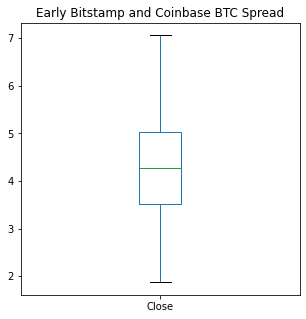

In [22]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE
arbitrage_spread_early.plot(title='Early Bitstamp and Coinbase BTC Spread', figsize=(5,5), kind ='box')



<AxesSubplot:title={'center':'May 2017'}, xlabel='Timestamp'>

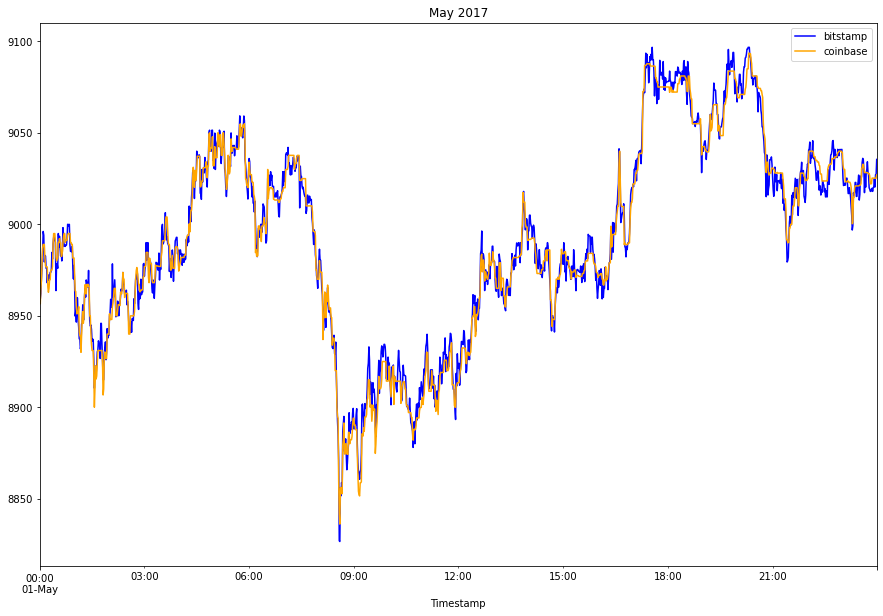

In [23]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced['Close'].loc['2018-05-01' : '2018-05-01'].plot(
    legend=True, figsize=(15, 10), title="May 2017", color="blue", label="bitstamp")
coinbase_sliced['Close'].loc['2018-05-01' : '2018-05-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [24]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-05-01'] -bitstamp_sliced['Close'].loc['2018-05-01']

# Generate summary statistics for the middle DataFrame
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1440.000000
mean       -0.924625
std         6.179368
min       -23.380000
25%        -5.237500
50%        -1.020000
75%         3.480000
max        18.260000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Middle Bitstamp and Coinbase BTC Spread'}>

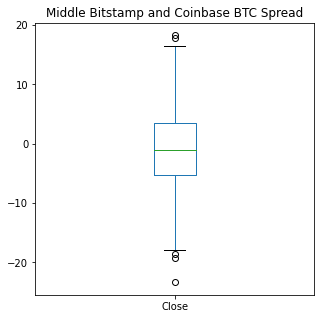

In [25]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot
arbitrage_spread_middle.plot(title='Middle Bitstamp and Coinbase BTC Spread', figsize=(5,5), kind ='box')



<AxesSubplot:title={'center':'January 2019'}, xlabel='Timestamp'>

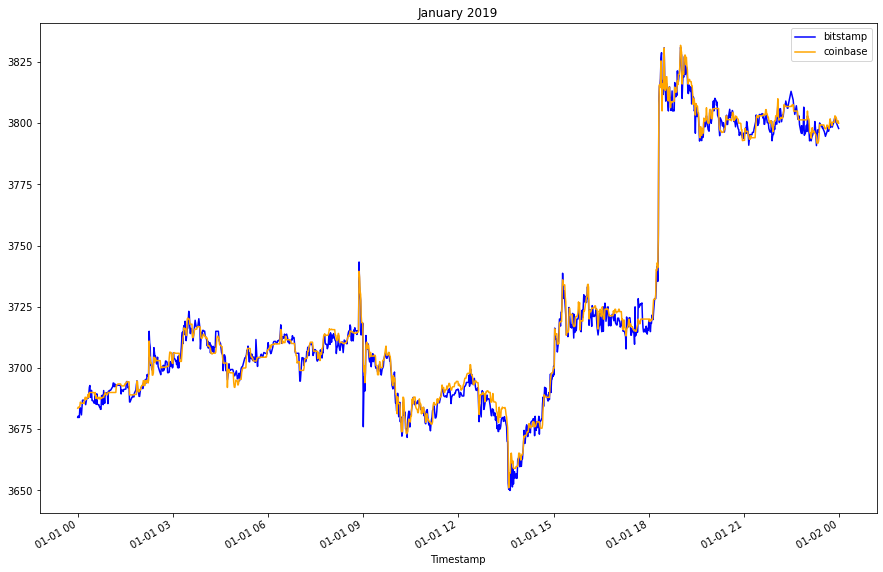

In [26]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
bitstamp_sliced['Close'].loc['2019-01-01' : '2019-01-01'].plot(
    legend=True, figsize=(15, 10), title="January 2019", color="blue", label="bitstamp")
coinbase_sliced['Close'].loc['2019-01-01' : '2019-01-01'].plot(
    legend=True, figsize=(15, 10), color="orange", label="coinbase")

In [27]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = coinbase_sliced['Close'].loc['2019-01-01'] -bitstamp_sliced['Close'].loc['2019-01-01']

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1219.000000
mean        0.996046
std         3.036932
min        -9.970000
25%        -0.975000
50%         1.100000
75%         3.115000
max        26.700000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Late Bitstamp and Coinbase BTC Spread'}>

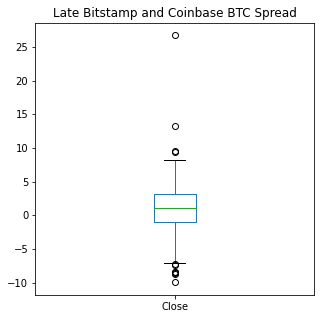

In [28]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot
# YOUR CODE HERE
arbitrage_spread_late.plot(title='Late Bitstamp and Coinbase BTC Spread', figsize=(5,5), kind ='box')



### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [29]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = coinbase_sliced['Close'].loc['2016-05-01'] -bitstamp_sliced['Close'].loc['2016-05-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
# Use the arbitrage_spread to determine the return percentage of the trades with a positive spread
# Include only the trades that have an arbitrage_spread that’s greater than 0
# Use the bitcoin_1 prices from the day as the denominator

spread_return = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp_sliced['Close'].loc['2016-05-01']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades = spread_return[spread_return > .01]
profitable_trades.head(10)

# Print the summary statistics for the profitable_trades DataFrame
profitable_trades.describe()

count    245.000000
mean       0.011667
std        0.001202
min        0.010022
25%        0.010750
50%        0.011466
75%        0.012249
max        0.015691
Name: Close, dtype: float64

In [30]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2017-05-01'] -bitstamp_sliced['Close'].loc['2017-05-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
spread_return = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp_sliced['Close'].loc['2017-05-01']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades = spread_return[spread_return > .01]
profitable_trades.head()

#Print the summary statistics 
profitable_trades.describe()


count    1283.000000
mean        0.034720
std         0.007220
min         0.016253
25%         0.030258
50%         0.033921
75%         0.039268
max         0.056481
Name: Close, dtype: float64

In [38]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-02-01'] -bitstamp_sliced['Close'].loc['2018-02-01']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
# YOUR CODE HERE
spread_return = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp_sliced['Close'].loc['2018-02-01']

# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades = spread_return[spread_return > .01]
profitable_trades.head(10)

# Print the summary statistics 
profitable_trades.describe()


count    1.000000
mean     0.013529
std           NaN
min      0.013529
25%      0.013529
50%      0.013529
75%      0.013529
max      0.013529
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [82]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0] / bitstamp['Close'].loc['2016-05-01']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_early.describe()

count    579.000000
mean       0.009517
std        0.002252
min        0.004124
25%        0.007746
50%        0.009499
75%        0.011134
max        0.015691
Name: Close, dtype: float64

In [83]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0] / bitstamp['Close'].loc['2017-05-01']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_middle.describe()

count    1283.000000
mean        0.034720
std         0.007220
min         0.016253
25%         0.030258
50%         0.033921
75%         0.039268
max         0.056481
Name: Close, dtype: float64

In [84]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0] / bitstamp['Close'].loc['2018-02-01']

# Review the spread return DataFrame
# YOUR CODE HERE
spread_return_late.describe()

count    911.000000
mean       0.002747
std        0.001911
min        0.000005
25%        0.001151
50%        0.002429
75%        0.003976
max        0.013529
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [85]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early =  spread_return_early[spread_return_early > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_early.head()

Timestamp
2016-05-01 00:02:00    0.011819
2016-05-01 00:24:00    0.012588
2016-05-01 00:28:00    0.012087
2016-05-01 00:29:00    0.012087
2016-05-01 00:32:00    0.011906
Name: Close, dtype: float64

In [86]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_middle.head()

Timestamp
2017-05-01 00:00:00    0.043570
2017-05-01 00:01:00    0.044113
2017-05-01 00:02:00    0.045339
2017-05-01 00:03:00    0.045638
2017-05-01 00:04:00    0.043366
Name: Close, dtype: float64

In [90]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
# YOUR CODE HERE
profitable_trades_late.head()

Timestamp
2018-02-01 09:47:00    0.013529
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [88]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe()

count    245.000000
mean       0.011667
std        0.001202
min        0.010022
25%        0.010750
50%        0.011466
75%        0.012249
max        0.015691
Name: Close, dtype: float64

In [58]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_middle.head()

Timestamp
2017-05-01 00:00:00    0.043570
2017-05-01 00:01:00    0.044113
2017-05-01 00:02:00    0.045339
2017-05-01 00:03:00    0.045638
2017-05-01 00:04:00    0.043366
Name: Close, dtype: float64

In [91]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_late.head()

Timestamp
2018-02-01 09:47:00    0.013529
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [78]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades * bitstamp['Close'].loc['2016-05-01']
# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna

# View the early profit DataFrame
# YOUR CODE HERE
profit_per_trade_early

<bound method Series.dropna of Timestamp
2016-05-01 00:02:00   NaN
2016-05-01 00:11:00   NaN
2016-05-01 00:13:00   NaN
2016-05-01 00:14:00   NaN
2016-05-01 00:24:00   NaN
                       ..
2016-05-01 23:52:00   NaN
2016-05-01 23:53:00   NaN
2016-05-01 23:58:00   NaN
2016-05-01 23:59:00   NaN
2018-02-01 09:47:00   NaN
Name: Close, Length: 630, dtype: float64>

In [ ]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE


In [ ]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = # YOUR CODE HERE

# Drop any missing values from the profit DataFrame
profit_per_trade_late = # YOUR CODE HERE

# View the early profit DataFrame
# YOUR CODE HERE


#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [65]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


In [ ]:
# Generate the summary statistics for the middle profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


In [ ]:
# Generate the summary statistics for the late profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [ ]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
# YOUR CODE HERE


In [ ]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
# YOUR CODE HERE


#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = # YOUR CODE HERE


In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE

In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = # YOUR CODE HERE


In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


In [ ]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = # YOUR CODE HERE


In [ ]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
# YOUR CODE HERE


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.